In [35]:
import re
import pandas as pd
import seaborn as sns

from afinn import Afinn

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [2]:
starbucks_df = pd.read_csv('starbucks_yelp_reviews.csv')
starbucks_df = starbucks_df.drop('Unnamed: 0', axis = 1)

print(starbucks_df.shape)
print(20*'-')
starbucks_df.head()

(24846, 7)
--------------------


,name,stars,text,date,state,latitude,longitude
0,Starbucks,1.0,Worst service ever. Only one here and took 10...,2017-07-18 17:31:43,NV,36.273808,-115.252006
1,Starbucks,1.0,This location is consistently out of breakfast...,2015-10-24 15:45:36,NV,36.273808,-115.252006
2,Starbucks,5.0,I just love the location! I love the barista's...,2017-03-04 06:39:24,NV,36.273808,-115.252006
3,Starbucks,4.0,Great spot for outdoor seating in the summer s...,2015-07-04 16:32:34,NV,36.273808,-115.252006
4,Starbucks,4.0,How did I end up across town at this starbucks...,2017-03-15 18:09:00,NV,36.273808,-115.252006


In [57]:
# build a list of strings for the CountVectorizer

starbucks_list = []

# Reindex the starbucks dataframe - since its a subset of the yelp data frame

starbucks_index = list(range(0, len(starbucks_df)))
starbucks_df = starbucks_df.reset_index()

#  non-alpha characters to remove

nonalpha = re.compile('[^a-zA-Z ]') # include a space in the pattern or it makes a massive 
                                    # single word of the entire string.

for i in starbucks_index :
    review = starbucks_df.loc[i,'text']
    review = nonalpha.sub('', review)
    starbucks_list.append(review)

In [58]:
# build the vectorizer

count_vect = CountVectorizer(stop_words='english')

# get count vectors 

cv_reviews = count_vect.fit_transform(starbucks_list)
columns = count_vect.get_feature_names()
starbucks_vect_df = pd.DataFrame(cv_reviews.toarray(), columns = columns)

#  labels for Stars

starbucks_labels = starbucks_df['stars']

In [59]:
print(starbucks_vect_df.shape)
starbucks_labels[:10]

(24846, 38834)


0    1.0
1    1.0
2    5.0
3    4.0
4    4.0
5    1.0
6    3.0
7    5.0
8    5.0
9    1.0
Name: stars, dtype: float64

In [8]:
starbucks_vect_df.to_csv('starbucks_count_vect.csv')
starbucks_labels.to_csv('starbucks_labels.csv')

### MNB Modeling

In [50]:
starbucks_vect_df = pd.read_csv('starbucks_count_vect.csv')
starbucks_labels = pd.read_csv('starbucks_labels.csv')
starbucks_labels = starbucks_labels['stars']

In [73]:
# split the data into 80 - 20% for MNB testing

X_train, X_test, y_train, y_test = train_test_split(starbucks_vect_df, starbucks_labels, test_size=0.2, random_state=0)

print('Starbucks Reviews - ')
print('Shape of Training ' ,  X_train.shape)
print('Shape of Testing ' , X_test.shape)
print(20*'-')

Starbucks Reviews - 
Shape of Training  (19876, 38834)
Shape of Testing  (4970, 38834)
--------------------


In [74]:
starbucks_mnb = MultinomialNB()
starbucks_mnb.fit(X_train, y_train)
starbucks_mnb_preds = starbucks_mnb.predict(X_test)

# Confusion Matrices

starbucks_mnb_matrix = confusion_matrix(y_test, starbucks_mnb_preds)
print('Starbucks Rating Prediction (MNB) Confusion Matrix')
print(starbucks_mnb_matrix)
print('Accuracy = ', accuracy_score(y_test, starbucks_mnb_preds))
print(20*'-')

Starbucks Rating Prediction (MNB) Confusion Matrix
[[1091   65   34   26   21]
 [ 413   59   66   73   27]
 [ 173   42  143  310   75]
 [  88   15   73  590  310]
 [  93    9   17  271  886]]
Accuracy =  0.5571428571428572
--------------------


### BernoulliNB Modeling

In [60]:
# build the vectorizer

bool_vect = CountVectorizer(stop_words='english', binary = True)

# get count vectors 

bool_reviews = bool_vect.fit_transform(starbucks_list)
columns = bool_vect.get_feature_names()
starbucks_boolvect_df = pd.DataFrame(bool_reviews.toarray(), columns = columns)

starbucks_boolvect_df.to_csv('starbucks_bool_vect.csv')

In [ ]:
starbucks_boolvect_df = pd.read_csv('starbucks_bool_vect.csv')
starbucks_labels = pd.read_csv('starbucks_labels.csv')
starbucks_labels = starbucks_labels['stars']

In [61]:
# split the data into 80 - 20% for MNB testing

X_train, X_test, y_train, y_test = train_test_split(starbucks_boolvect_df, starbucks_labels, test_size=0.2, random_state=0)

print('Starbucks Reviews - ')
print('Shape of Training ' ,  X_train.shape)
print('Shape of Testing ' , X_test.shape)
print(20*'-')

Starbucks Reviews - 
Shape of Training  (19876, 38834)
Shape of Testing  (4970, 38834)
--------------------


In [62]:
starbucks_bern = BernoulliNB()
starbucks_bern.fit(X_train, y_train)
starbucks_bern_preds = starbucks_bern.predict(X_test)

# Confusion Matrices

starbucks_bern_matrix = confusion_matrix(y_test, starbucks_bern_preds)
print('Starbucks Rating Prediction (Bernoulli) Confusion Matrix')
print(starbucks_bern_matrix)
print('Accuracy = ', accuracy_score(y_test, starbucks_bern_preds))
print(20*'-')

Starbucks Rating Prediction (Bernoulli) Confusion Matrix
[[ 995   28   10   21  183]
 [ 372   47   27   56  136]
 [ 138   30   81  224  270]
 [  48   26   67  377  558]
 [  55   20   29  146 1026]]
Accuracy =  0.5082494969818914
--------------------


### SVM Modeling

In [36]:
starbucks_vect_df = pd.read_csv('starbucks_count_vect.csv')
starbucks_labels = pd.read_csv('starbucks_labels.csv')
starbucks_labels = starbucks_labels['stars']

In [76]:
# split the data into 80 - 20% for svm testing

X_train, X_test, y_train, y_test = train_test_split(starbucks_vect_df, starbucks_labels, test_size=0.2, random_state=0)

print('Starbucks Reviews - ')
print('Shape of Training ' ,  X_train.shape)
print('Shape of Testing ' , X_test.shape)
print(20*'-')

Starbucks Reviews - 
Shape of Training  (19876, 38834)
Shape of Testing  (4970, 38834)
--------------------


In [77]:
starbucks_svm = LinearSVC(C=1)
starbucks_svm.fit(X_train, y_train)
starbucks_svm_preds = starbucks_svm.predict(X_test)

In [78]:
# Confusion Matrices

starbucks_svm_matrix = confusion_matrix(y_test, starbucks_svm_preds)
print('Starbucks Rating Prediction (SVM) Confusion Matrix')
print(starbucks_svm_matrix)
print('Accuracy = ', accuracy_score(y_test, starbucks_svm_preds))
print(20*'-')

Starbucks Rating Prediction (SVM) Confusion Matrix
[[852 205  90  41  49]
 [266 153 113  64  42]
 [100 135 217 184 107]
 [ 41  70 180 437 348]
 [ 37  26  67 286 860]]
Accuracy =  0.506841046277666
--------------------


### AFINN sentiment analysis

In [3]:
starbucks_df = pd.read_csv('starbucks_yelp_reviews.csv')


In [4]:
starbucks_df = starbucks_df.drop(['Unnamed: 0','name', 'date', 'state', 'latitude', 'longitude'], axis = 1)

print(starbucks_df.shape)
print(20*'-')
starbucks_df.head()

(24846, 2)
--------------------


,stars,text
0,1.0,Worst service ever. Only one here and took 10...
1,1.0,This location is consistently out of breakfast...
2,5.0,I just love the location! I love the barista's...
3,4.0,Great spot for outdoor seating in the summer s...
4,4.0,How did I end up across town at this starbucks...


In [5]:
# initialize the afinn class

afinn = Afinn()
starbucks_df['Afinn_Score'] = "none"

In [6]:
for i in range(0,len(starbucks_df)):
    text = str(starbucks_df.loc[i,'text'])
    starbucks_df.loc[i,'Afinn_Score'] = afinn.score(text)


C:\Users\Zac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

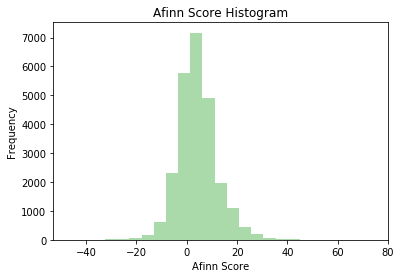

In [26]:
# plot the frequency of afinn scores

sent_hist = sns.distplot(starbucks_df['Afinn_Score'], bins = 25, color='tab:green', kde=False, norm_hist=False)
sent_hist.set_title('Afinn Score Histogram')
sent_hist.set_xlabel('Afinn Score')
sent_hist.set_ylabel('Frequency')

C:\Users\Zac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[(0, 7000),
 (1, 5)]

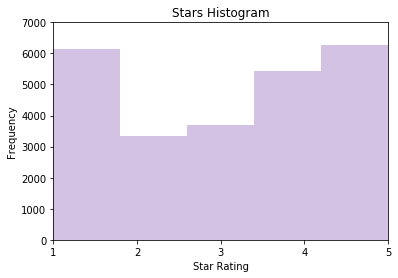

In [34]:
# plot the frequency of star ratings

stars_hist = sns.distplot(starbucks_df['stars'], bins = 5, color='tab:purple', kde=False, norm_hist=False)
stars_hist.set_title('Stars Histogram')
stars_hist.set_xlabel('Star Rating')
stars_hist.set_ylabel('Frequency')
stars_hist.set(xlim=(1,5),xticks=[1,2,3,4,5], ylim=(0,7000))

In [37]:
# find the best scoring AFINN score and the review with it.

max_index = starbucks_df['Afinn_Score'].idxmax()
best = starbucks_df.loc[max_index,'text']

print(starbucks_df.loc[max_index,'Afinn_Score'], 'AFINN Score')
print('----')
print(starbucks_df.loc[max_index,'stars'], 'Rating')
print('----')
print(best)

74 AFINN Score
----
4.0 Rating
----












Will I return, not in the morning time when I "need" and "long" for my coffee! If I was just casually shopping and doing running around this is a great little store. The store is so clean and the staff way tres outgoing and friendly. Considering the area which outside the store is not the best area! They have done a fantastic job at keeping this store so amazing and awesome! Bravo there. The reason for the four stars is for the speed of service which should be the utmost priority. I timed how long that it took to make my coffee from the order until I had it . It was eight minutes. This is Starbucks loosing money, not that she was not amazing, but her speed needs to improve! She is an awesome overly friendly talented individual. Just get the coffee to people in the morning fast so that race car stays out of the red!


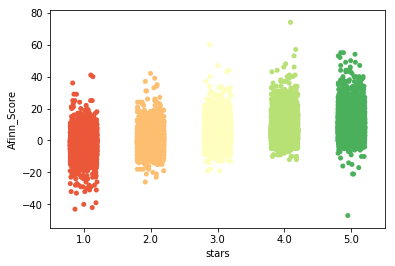

In [30]:
sns.stripplot('stars', 'Afinn_Score', data=starbucks_df, jitter=0.2, palette = 'RdYlGn')

Text(0,0.5,'AFINN Score')

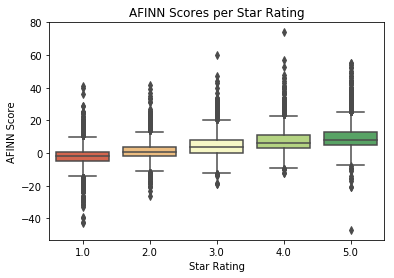

In [8]:
sent_stars_plt = sns.boxplot('stars', 'Afinn_Score', data=starbucks_df, palette = 'RdYlGn')
sent_stars_plt.set_title('AFINN Scores per Star Rating')
sent_stars_plt.set_xlabel('Star Rating')
sent_stars_plt.set_ylabel('AFINN Score')

### Analyze a Out-of-Sample review from a local Starbucks

In [53]:
text = ['''
       Very good service and terrific staff. They were engaging and welcoming and you could tell  
       these folks really enjoyed their job and greeting visitors. Just an Airport Starbucks,  
       but with a great brew crew!
       '''
        , 
       '''
       Oh, my word! We need some serious staff training heah! A line of people, orders taken quickly
       but what a bottleneck between orders and actual fulfillment! Ok, first, what are you doing
       making people who just want a regular coffee wait while you make lattes and frappuccinos? And
       everyone waiting was discussing whether waiting longer was worth missing their flight! It
       wasn't. Lukewarm latte, sullen and slow service, not even close to what a Starbucks should
       be!
       ''']

score1 = afinn.score(text[0])
score2 = afinn.score(text[1])
print(score1, score2)

13.0 1.0


In [67]:
# get count vectors 

cv_ = count_vect.transform(text)
columns = count_vect.get_feature_names()
_df = pd.DataFrame(cv_.toarray(), columns = columns)


bool_ = bool_vect.transform(text)
columns = bool_vect.get_feature_names()
_booldf = pd.DataFrame(bool_.toarray(), columns = columns)

In [79]:
mnb_pred = starbucks_mnb.predict(_df)
bern_pred = starbucks_bern.predict(_booldf)
svm_pred = starbucks_svm.predict(_df)

In [83]:
print('MNB Preds - ', mnb_pred[0],',', mnb_pred[1])
print('Bernoulli Preds - ', bern_pred[0],',', bern_pred[1])
print('SVM Preds - ', svm_pred[0],',', svm_pred[1])

MNB Preds -  5.0 , 2.0
Bernoulli Preds -  5.0 , 1.0
SVM Preds -  5.0 , 2.0
